# Startups Sataset Multi-Linear Regression

In [322]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse,r2_score as r2,mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [323]:
dataset = pd.read_csv('dataset.csv')

In [324]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [325]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          49 non-null float64
Administration     49 non-null float64
Marketing Spend    49 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [326]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,49.000000,49.000000,49.000000,50.000000
mean,74093.608776,121315.290408,215331.732449,112012.639200
std,46301.730529,28307.373863,119665.391550,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,103057.490000,134050.070000,90138.902500
50%,73994.560000,122616.840000,214634.810000,107978.190000
75%,101913.080000,145077.580000,299737.290000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


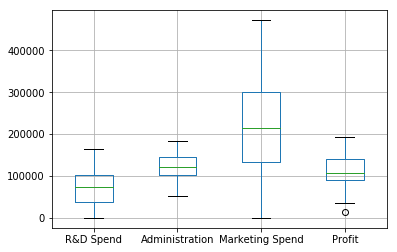

In [327]:
dataset.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE34040160>,
      dtype=object)

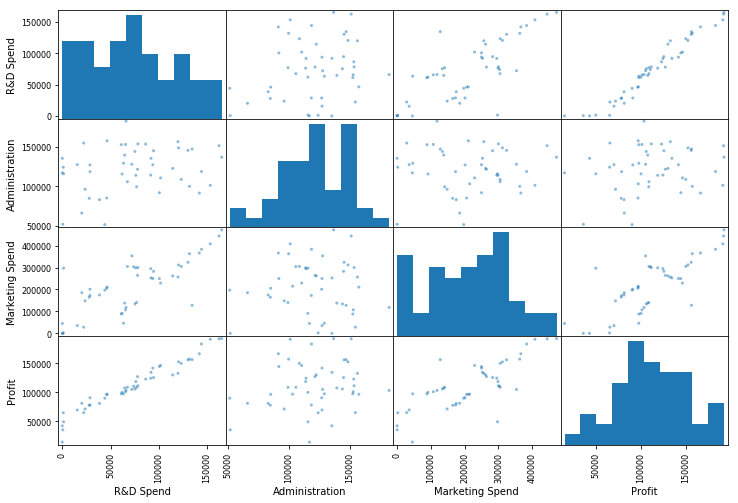

In [328]:
pd.plotting.scatter_matrix(dataset,figsize=(12,8))

## Replacing Null-Values with the median

In [329]:
median = dataset.median()
dataset = dataset.fillna(median)

In [330]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


## Splitting Dataset into X & Y

In [331]:
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

## Encoding Categorical Data

In [332]:
# Firstly, we encode the Column
LE = LabelEncoder()
X.State = LE.fit_transform(X.State)
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [333]:
LE.classes_

array(['California', 'Florida', 'New York'], dtype=object)

In [334]:
LE.inverse_transform([0]), LE.inverse_transform([1]), LE.inverse_transform([2])

(array(['California'], dtype=object),
 array(['Florida'], dtype=object),
 array(['New York'], dtype=object))

In [335]:
OHE = OneHotEncoder(categorical_features = [3])
X = OHE.fit_transform(X).toarray()
X

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [336]:
X = X.astype(int)
Y = Y.astype(int)

In [337]:
X = X[:, 1:]
X

array([[     0,      1, 165349, 136897, 471784],
       [     0,      0, 162597, 151377, 443898],
       [     1,      0, 153441, 101145, 407934],
       [     0,      1, 144372, 118671, 383199],
       [     1,      0, 142107,  91391, 366168],
       [     0,      1, 131876,  99814, 362861],
       [     0,      0, 134615, 147198, 127716],
       [     1,      0, 130298, 145530, 323876],
       [     0,      1, 120542, 148718, 311613],
       [     0,      0, 123334, 108679, 304981],
       [     1,      0, 101913, 110594, 229160],
       [     0,      0, 100671,  91790, 249744],
       [     1,      0,  93863, 127320, 249839],
       [     0,      0,  91992, 135495, 252664],
       [     1,      0, 119943, 156547, 256512],
       [     0,      1, 114523, 122616, 261776],
       [     0,      0,  78013, 121597, 264346],
       [     0,      1,  94657, 145077, 282574],
       [     1,      0,  91749, 114175, 294919],
       [     0,      1,  86419, 153514, 214634],
       [     0,     

# Linear Model With NO Edition

In [338]:
X1, Y1 = X.copy(), Y.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae3483ce80>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae3482f828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae3483cd30>,
 'medians': [<matplotlib.lines.Line2D at 0x1ae3482feb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ae3482ff98>,
 'means': []}

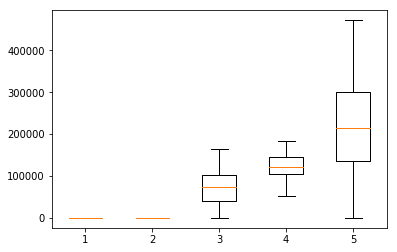

In [339]:
plt.boxplot(X1)
#boxplot before normalizing

In [340]:
regressor1 = LinearRegression()
regressor1.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [341]:
Y_hat1 = regressor1.predict(X1)

In [342]:
intercept1, coef1 = regressor1.intercept_, regressor1.coef_

In [343]:
print('Intercept: ', intercept1, '\n', 'Coef: ', coef1 )

Intercept:  48716.72024640213 
 Coef:  [-9.74760732e+02 -4.82830489e+02  7.90147864e-01 -1.86475844e-02
  3.47915489e-02]


In [344]:
mae1, mse1, rmse1, R21  = mae(Y1, Y_hat1), mse(Y1, Y_hat1),math.sqrt(mse(Y1, Y_hat1)), r2_score(Y1, Y_hat1)
mae1, mse1,rmse1, R21 

(6589.347070003831, 81985091.69343524, 9054.561927196435, 0.9485048888883866)

In [345]:
print('MSE: ', mse1,'\n','RMSE:', rmse1,'\n' 'MAE: ', mae1,'\n' 'R^2:' ,R21)

MSE:  81985091.69343524 
 RMSE: 9054.561927196435 
MAE:  6589.347070003831 
R^2: 0.9485048888883866


## Linear-Model with Range Scaling

In [346]:
X2, Y2 = X.copy(), Y.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae34650518>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae34650ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae346500f0>,
 'medians': [<matplotlib.lines.Line2D at 0x1ae34650fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ae3465a5c0>,
 'means': []}

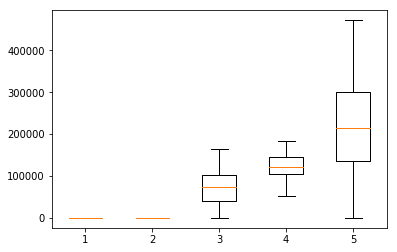

In [347]:
plt.boxplot(X)
#boxplot before normalizing

In [348]:
X2 = minmax_scale(X2)
Y2 = minmax_scale(Y2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


{'whiskers': [<matplotlib.lines.Line2D at 0x1ae346ef588>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae346efc18>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae346ef160>,
 'medians': [<matplotlib.lines.Line2D at 0x1ae346fa2e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ae346fa630>,
 'means': []}

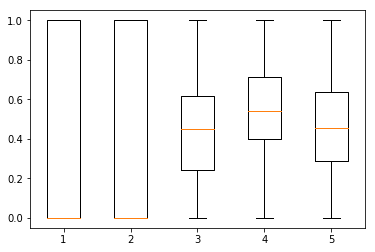

In [349]:
plt.boxplot(X2)
#boxplot after normalizing

In [350]:
regressor2 = LinearRegression()
regressor2.fit(X2, Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [351]:
Y_hat2 = regressor2.predict(X2)

In [352]:
intercept2, coef2 = regressor2.intercept_, regressor2.coef_

In [353]:
print('Intercept: ', intercept2, '\n', 'Coef: ', coef2 )

Intercept:  0.18627895132035938 
 Coef:  [-0.00548914 -0.00271895  0.73572564 -0.01379426  0.09243212]


In [354]:
mae2, mse2, rmse2, R22  = mae(Y2, Y_hat2), mse(Y2, Y_hat2),math.sqrt(mse(Y2, Y_hat2)), r2_score(Y2, Y_hat2)
mae2, mse2,rmse2, R22 

(0.037106358092148045,
 0.002599840970312119,
 0.05098863569769364,
 0.9485048888883865)

In [355]:
print('MSE: ', mse2,'\n','RMSE:', rmse2,'\n' 'MAE: ', mae2,'\n' 'R^2:' ,R22)

MSE:  0.002599840970312119 
 RMSE: 0.05098863569769364 
MAE:  0.037106358092148045 
R^2: 0.9485048888883865


## Linear-Model With Data Normalization on Z-Distribution

In [356]:
X3, Y3 = X.copy(), Y.values.reshape((-1, 1)).copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae34793e10>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae347974e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae347939e8>,
 'medians': [<matplotlib.lines.Line2D at 0x1ae34797b70>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ae34797eb8>,
 'means': []}

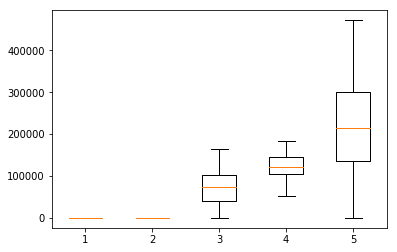

In [357]:
plt.boxplot(X)
#boxplot before normalizing

### It doesn't make sense to apply the Z-Technique on the categorical encoded data
#### so, let's apply ito only on the continuous X & Y Data then concat all the X Columns again

In [358]:
X_cat = X3[:,0:2]
X_cat = pd.DataFrame(X_cat)

In [359]:
X_ss = StandardScaler()
Y_ss = StandardScaler()
X3 = X_ss.fit_transform(X3[:,2:5])
Y3 = Y_ss.fit_transform(Y3)
X3 = pd.DataFrame(X3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [360]:
X3 = pd.concat([X3, X_cat], axis = 1 )

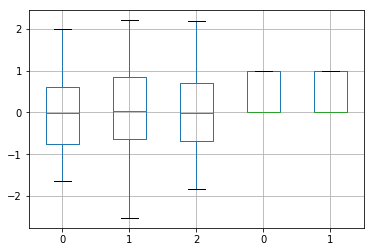

In [361]:
X3.boxplot()
#boxplot before normalizing

In [362]:
regressor3 = LinearRegression()
regressor3.fit(X3, Y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [363]:
Y_hat3 = regressor3.predict(X3)

In [364]:
intercept3, coef3 = regressor3.intercept_, regressor3.coef_

In [365]:
print('Intercept: ', intercept3, '\n', 'Coef: ', coef3 )

Intercept:  [0.01193166] 
 Coef:  [[ 0.89837287 -0.0129623   0.10223356 -0.02442944 -0.01210069]]


In [366]:
mae3, mse3, rmse3, R23  = mae(Y3, Y_hat3), mse(Y3, Y_hat3),math.sqrt(mse(Y3, Y_hat3)), r2_score(Y3, Y_hat3)
mae3, mse3,rmse3, R23 

(0.16514215191826223,
 0.05149511111161347,
 0.22692534259446095,
 0.9485048888883865)

In [367]:
print('MSE: ', mse3,'\n','RMSE:', rmse3,'\n' 'MAE: ', mae3,'\n' 'R^2:' ,R23)

MSE:  0.05149511111161347 
 RMSE: 0.22692534259446095 
MAE:  0.16514215191826223 
R^2: 0.9485048888883865


## Linear-Model With Data Normalization on Z-Distribution and Removing Outliers 
#### IF there are any outlieres 

In [368]:
X4, Y4= X3.copy(), Y3.copy()
X4 = pd.DataFrame(X4)
Y4 = pd.DataFrame(Y4)

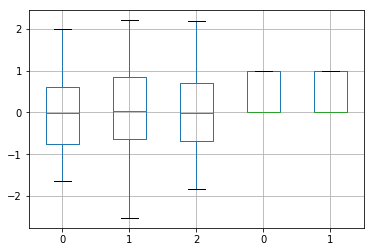

In [369]:
X4.boxplot()

In [370]:
Xnorm, Ynorm = X3.copy(),Y3.copy()
Xnorm = pd.DataFrame(Xnorm)
Ynorm = pd.DataFrame(Ynorm)
dataset_z = pd.concat([Xnorm, Ynorm], axis= 1)
dataset_z.head()

,0,1,2,0,1,0
0,2.011581,0.560865,2.187393,0,1,2.011197
1,1.950919,1.082930,1.949554,0,0,1.999443
2,1.749095,-0.728145,1.642819,1,0,1.980847
3,1.549189,-0.096259,1.431855,0,1,1.776617
4,1.499262,-1.079818,1.286599,1,0,1.357731


In [371]:
dataset_z.columns = ['R&D Spend', 'Administration', 'Marketing Spend', '0', '1', 'Profit' ]

In [372]:
dataset_z.head()

,R&D Spend,Administration,Marketing Spend,0,1,Profit
0,2.011581,0.560865,2.187393,0,1,2.011197
1,1.950919,1.082930,1.949554,0,0,1.999443
2,1.749095,-0.728145,1.642819,1,0,1.980847
3,1.549189,-0.096259,1.431855,0,1,1.776617
4,1.499262,-1.079818,1.286599,1,0,1.357731


In [373]:
dataset_z[dataset_z > 3] = 3
dataset_z[dataset_z < -3] = -3
X4 = dataset_z.iloc[:, :-1]
Y4 = dataset_z.iloc[:, -1].values.reshape((-1, 1))

In [374]:
regressor4 = LinearRegression()
regressor4.fit(X4, Y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [375]:
Y_hat4 = regressor4.predict(X4)

In [376]:
intercept4, coef4 = regressor4.intercept_, regressor4.coef_

In [377]:
print('Intercept: ', intercept4, '\n', 'Coef: ', coef4 )

Intercept:  [0.01193166] 
 Coef:  [[ 0.89837287 -0.0129623   0.10223356 -0.02442944 -0.01210069]]


In [378]:
mae4, mse4, rmse4, R24  = mae(Y3, Y_hat4), mse(Y4, Y_hat4),math.sqrt(mse(Y4, Y_hat4)), r2_score(Y4, Y_hat4)
mae4, mse4,rmse4, R24 

(0.16514215191826223,
 0.05149511111161347,
 0.22692534259446095,
 0.9485048888883865)

In [379]:
print('MSE: ', mse4,'\n','RMSE:', rmse4,'\n' 'MAE: ', mae4,'\n' 'R^2:' ,R24)

MSE:  0.05149511111161347 
 RMSE: 0.22692534259446095 
MAE:  0.16514215191826223 
R^2: 0.9485048888883865


## Models Evaluation

In [380]:
Model_eval = pd.DataFrame([['Model1', mae1, mse1, rmse1, R21]
                          , ['Range Scaling',mae2, mse2, rmse2, R22]
                          , ['Z Distributed with outliers', mae3, mse3, rmse3, R23]
                          ,['Z Distributed without outliers', mae4, mse4, rmse4, R24]]
                        ,columns=['Model', 'MAE', 'MSE','RMSE', 'R Squared'])

In [381]:
Model_eval

,Model,MAE,MSE,RMSE,R Squared
0,Model1,6589.347070,8.198509e+07,9054.561927,0.948505
1,Range Scaling,0.037106,2.599841e-03,0.050989,0.948505
2,Z Distributed with outliers,0.165142,5.149511e-02,0.226925,0.948505
3,Z Distributed without outliers,0.165142,5.149511e-02,0.226925,0.948505
